In [29]:
import matplotlib.pyplot as plt
import matplotlib
import numpy
import helpers
import os
import logging, sys
import math
matplotlib.rcParams['figure.figsize'] = [10, 5]

breakdowns = [
    "read",
    "invert",
    "predict",
    "deconvolve",
    "other"
]

#### P.S all angular resolutions and EM frequencies for simulated datasets are not in line with the actual sources

## Results for Sgr A Simulated dataset
#### Telescope Configuration: MEERKAT
#### Frequency Bands: 1Ghz
#### RA and DEC: (56, -15)
#### Observation Time (HA): (-2, 2) 
#### Samples: Every 120s
#### $\text{V}_\mathcal{L}$ size: 132648
#### $\text{V}_\mathcal{H}$ size: 121140
#### $\text{V}$ size: 249600
#### $\ell$: 30
#### $\delta$: 1
#### Angular Resolution: 0.00001849451rad
#### Pixel Resolution: 512x512

In [30]:
sgra_res_path = "../results/ri_parallelization_results/SGRA/"

vl_parallel_breakdown_data = helpers.read_csv(sgra_res_path + "SGRA_parallel/mc_timings_breakdown_0", separate_rows=True)
vh_parallel_breakdown_data = helpers.read_csv(sgra_res_path + "SGRA_parallel/mc_timings_breakdown_1", separate_rows=True)
serial_breakdown_data = helpers.read_csv(sgra_res_path + "SGRA_serial/mc_timings_breakdown", separate_rows=True)

### Serial breakdown

[15.379692077636719, 0, 0, 0, 0.016548633575439453]
[3.396073341369629, 0.03388404846191406, 0, 0, 0.39231204986572266]
[3.430793285369873, 0.012661457061767578, 0.3006012439727783, 66.63180828094482, 0.04225659370422363]
[3.5291645526885986, 0.010600566864013672, 0.299607515335083, 31.550690412521362, 0.05179762840270996]
[3.4668543338775635, 0.010541439056396484, 0.30122971534729004, 31.59778141975403, 0.04588723182678223]
[3.4551796913146973, 0.012121438980102539, 0.3020472526550293, 31.619622945785522, 0.04843640327453613]
[3.429760456085205, 0.012392759323120117, 0.3063690662384033, 31.965506315231323, 0.04916191101074219]
[3.460355043411255, 0.012173891067504883, 0.3069274425506592, 31.707419872283936, 0.04903578758239746]
[3.459597110748291, 0.011612176895141602, 0.30513834953308105, 31.591886520385742, 0.04883599281311035]
[3.473874092102051, 0.01169133186340332, 0.30593109130859375, 31.623975038528442, 0.04885125160217285]
[3.5100486278533936, 0.010463953018188477, 0.300053358

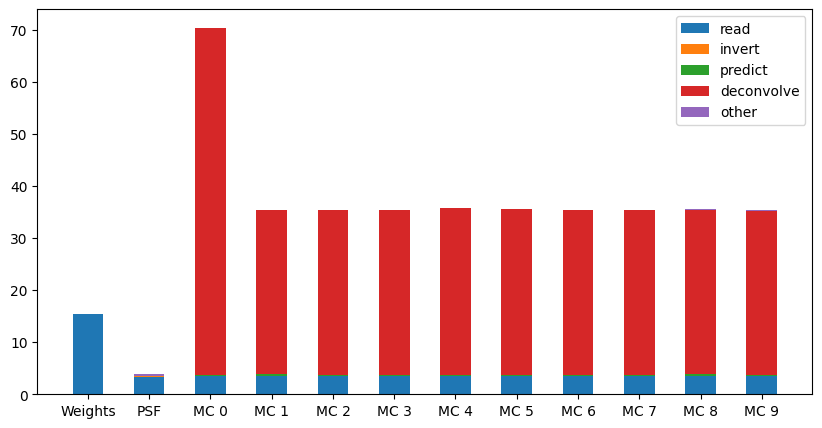

In [41]:
for i, lst in enumerate(serial_breakdown_data):
    serial_breakdown_data[i] = list(map(float, lst))

serial_weights_timings = serial_breakdown_data[1]
serial_psf_timings = serial_breakdown_data[2]

serial_mc_timings = serial_breakdown_data[3:]

width = 0.5

labels = [
    "Weights",
    "PSF"
]
    
bottom = numpy.zeros(len(serial_mc_timings) + 2)
    
fig, ax = plt.subplots()

timings = []
timings.append([serial_weights_timings[0], 0, 0, 0, sum(serial_weights_timings[1:])])
timings.append([serial_psf_timings[0], serial_psf_timings[2], 0, 0, serial_psf_timings[1] + sum(serial_psf_timings[3:])])

for i, curr_mc_timings in enumerate(serial_mc_timings):
    labels.append("MC " + str(i))
    other_timings = sum(curr_mc_timings[1:4]) + curr_mc_timings[7]
    timings.append([curr_mc_timings[0], curr_mc_timings[5], curr_mc_timings[4], curr_mc_timings[8], other_timings])
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        print(curr_timing)
        curr_breakdown_timing.append(curr_timing[i])
    
    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

### Parallel breakdown $\text{V}_\mathcal{L}$ node

[[4.071270227432251, 0, 0, 0, 0.019326448440551758], [1.840264081954956, 0.04135751724243164, 0, 0, 0.2293689250946045], [0, 0, 0, 0, 8.082389831542969e-05], [1.8261566162109375, 0.010952472686767578, 0.2732675075531006, 37.62822914123535, 0.9200448989868164], [1.8517045974731445, 0.011243343353271484, 0.27103400230407715, 33.425012826919556, 1.4863862991333008], [1.8494482040405273, 0.011025667190551758, 0.2691948413848877, 33.776416301727295, 0.3542957305908203], [1.8431780338287354, 0.010739326477050781, 0.26729655265808105, 33.823421001434326, 0.47365665435791016], [1.827064037322998, 0.011077642440795898, 0.26981425285339355, 33.663042306900024, 1.2757179737091064]]


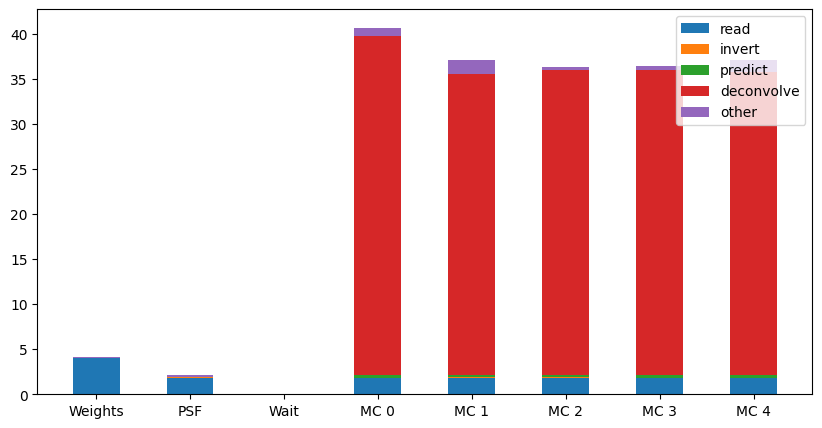

In [46]:
for i, lst in enumerate(vl_parallel_breakdown_data):
    vl_parallel_breakdown_data[i] = list(map(float, lst))

vl_weights_timings = vl_parallel_breakdown_data[1]
vl_psf_timings = vl_parallel_breakdown_data[2]
vl_wait_timings = vl_parallel_breakdown_data[3]
vl_mc_timings = vl_parallel_breakdown_data[4:]

width = 0.5

labels = [
    "Weights",
    "PSF",
    "Wait"
]
    
bottom = numpy.zeros(len(vl_mc_timings) + 3)
    
fig, ax = plt.subplots()

timings = []
timings.append([vl_weights_timings[0], 0, 0, 0, sum(vl_weights_timings[1:])])
timings.append([vl_psf_timings[0], vl_psf_timings[2], 0, 0, vl_psf_timings[1] + sum(vl_psf_timings[3:])])
timings.append([0, 0, 0, 0, vl_wait_timings[0]])

for i, curr_mc_timings in enumerate(vl_mc_timings):
    labels.append("MC " + str(i))
    other_timings = curr_mc_timings[0] + sum(curr_mc_timings[2:5]) + curr_mc_timings[7] + curr_mc_timings[8] + sum(curr_mc_timings[10:])
    timings.append([curr_mc_timings[1], curr_mc_timings[6], curr_mc_timings[5], curr_mc_timings[9], other_timings])
    
print(timings)
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        curr_breakdown_timing.append(curr_timing[i])

    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

### Parallel $\text{V}_\mathcal{H}$ breakdown

[[3.9072816371917725, 0, 0, 0, 0.018872737884521484], [1.675912857055664, 0.04099249839782715, 0, 0, 0.25496578216552734], [0, 0, 0, 0, 9.107589721679688e-05], [1.723717212677002, 0.010643959045410156, 0.28783440589904785, 38.77977395057678, 0.30394458770751953], [1.7381010055541992, 0.011008262634277344, 0.2857527732849121, 34.71370792388916, 0.29858827590942383], [1.7358324527740479, 0.010864973068237305, 0.28699541091918945, 33.945361375808716, 0.2990384101867676], [1.7516868114471436, 0.010819196701049805, 0.2891724109649658, 34.0715811252594, 0.2952704429626465], [1.7259900569915771, 0.010905027389526367, 0.2899291515350342, 34.72382164001465, 0.29764652252197266]]


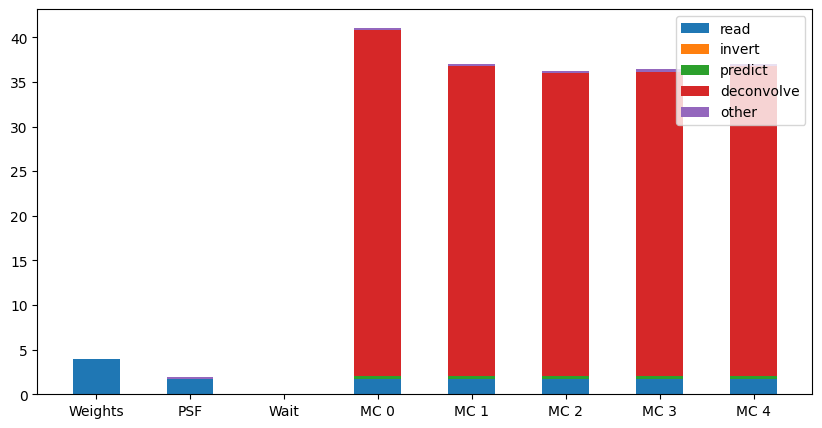

In [47]:
for i, lst in enumerate(vh_parallel_breakdown_data):
    vh_parallel_breakdown_data[i] = list(map(float, lst))

vh_weights_timings = vh_parallel_breakdown_data[1]
vh_psf_timings = vh_parallel_breakdown_data[2]
vh_wait_timings = vh_parallel_breakdown_data[3]
vh_mc_timings = vh_parallel_breakdown_data[4:]

width = 0.5

labels = [
    "Weights",
    "PSF",
    "Wait"
]
    
bottom = numpy.zeros(len(vh_mc_timings) + 3)
    
fig, ax = plt.subplots()

timings = []
timings.append([vh_weights_timings[0], 0, 0, 0, sum(vh_weights_timings[1:])])
timings.append([vh_psf_timings[0], vh_psf_timings[2], 0, 0, vh_psf_timings[1] + sum(vh_psf_timings[3:])])
timings.append([0, 0, 0, 0, vh_wait_timings[0]])

for i, curr_mc_timings in enumerate(vh_mc_timings):
    labels.append("MC " + str(i))
    other_timings = curr_mc_timings[0] + sum(curr_mc_timings[2:5]) + curr_mc_timings[7] + curr_mc_timings[8] + sum(curr_mc_timings[10:])
    timings.append([curr_mc_timings[1], curr_mc_timings[6], curr_mc_timings[5], curr_mc_timings[9], other_timings])
    
print(timings)
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        curr_breakdown_timing.append(curr_timing[i])

    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

## Results for Sgr B Simulated dataset
#### Telescope Configuration: SKA-MID (full 197)
#### Frequency Bands: 1Ghz
#### RA and DEC: (56, -50)
#### Observation Time (HA): (-2, 2) 
#### Samples: Every 30s
#### $\text{V}_\mathcal{L}$ size: 6989812
#### $\text{V}_\mathcal{H}$ size: 2532615
#### $\text{V}$ size: 9361440
#### $\ell$: 20
#### $\delta$: 1
#### Angular Resolution: 0.0000008755170341876385rad
#### Pixel Resolution: 512x512

In [48]:
sgrb_res_path = "../results/ri_parallelization_results/SGRB/"

vl_parallel_breakdown_data = helpers.read_csv(sgrb_res_path + "SGRB_parallel/mc_timings_breakdown_0", separate_rows=True)
vh_parallel_breakdown_data = helpers.read_csv(sgrb_res_path + "SGRB_parallel/mc_timings_breakdown_1", separate_rows=True)
serial_breakdown_data = helpers.read_csv(sgrb_res_path + "SGRB_serial/mc_timings_breakdown", separate_rows=True)

### Serial breakdown

IndexError: list index out of range

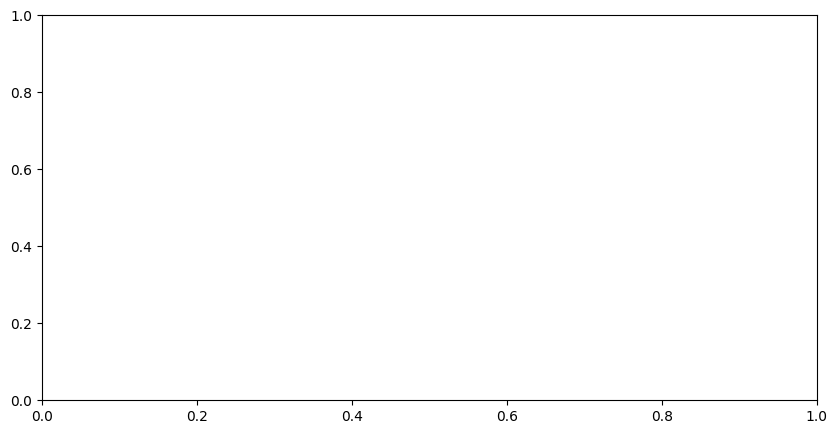

In [51]:
for i, lst in enumerate(serial_breakdown_data):
    serial_breakdown_data[i] = list(map(float, lst))

serial_weights_timings = serial_breakdown_data[1]
serial_psf_timings = serial_breakdown_data[2]

serial_mc_timings = serial_breakdown_data[3:]

width = 0.5

labels = [
    "Weights",
    "PSF"
]
    
bottom = numpy.zeros(len(serial_mc_timings) + 2)
    
fig, ax = plt.subplots()

timings = []
timings.append([serial_weights_timings[0], 0, 0, 0, sum(serial_weights_timings[1:])])
timings.append([serial_psf_timings[0], serial_psf_timings[2], 0, 0, serial_psf_timings[1] + sum(serial_psf_timings[3:])])

for i, curr_mc_timings in enumerate(serial_mc_timings):
    labels.append("MC " + str(i))
    other_timings = sum(curr_mc_timings[1:4]) + curr_mc_timings[7]
    timings.append([curr_mc_timings[0], curr_mc_timings[5], curr_mc_timings[4], curr_mc_timings[8], other_timings])
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        print(curr_timing)
        curr_breakdown_timing.append(curr_timing[i])
    
    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

### Parallel breakdown $\text{V}_\mathcal{L}$ node

[[4.071270227432251, 0, 0, 0, 0.019326448440551758], [1.840264081954956, 0.04135751724243164, 0, 0, 0.2293689250946045], [0, 0, 0, 0, 8.082389831542969e-05], [1.8261566162109375, 0.010952472686767578, 0.2732675075531006, 37.62822914123535, 0.9200448989868164], [1.8517045974731445, 0.011243343353271484, 0.27103400230407715, 33.425012826919556, 1.4863862991333008], [1.8494482040405273, 0.011025667190551758, 0.2691948413848877, 33.776416301727295, 0.3542957305908203], [1.8431780338287354, 0.010739326477050781, 0.26729655265808105, 33.823421001434326, 0.47365665435791016], [1.827064037322998, 0.011077642440795898, 0.26981425285339355, 33.663042306900024, 1.2757179737091064]]


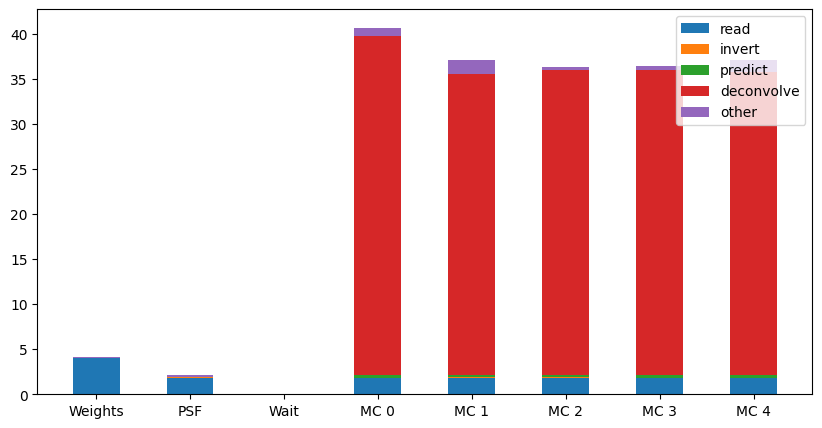

In [46]:
for i, lst in enumerate(vl_parallel_breakdown_data):
    vl_parallel_breakdown_data[i] = list(map(float, lst))

vl_weights_timings = vl_parallel_breakdown_data[1]
vl_psf_timings = vl_parallel_breakdown_data[2]
vl_wait_timings = vl_parallel_breakdown_data[3]
vl_mc_timings = vl_parallel_breakdown_data[4:]

width = 0.5

labels = [
    "Weights",
    "PSF",
    "Wait"
]
    
bottom = numpy.zeros(len(vl_mc_timings) + 3)
    
fig, ax = plt.subplots()

timings = []
timings.append([vl_weights_timings[0], 0, 0, 0, sum(vl_weights_timings[1:])])
timings.append([vl_psf_timings[0], vl_psf_timings[2], 0, 0, vl_psf_timings[1] + sum(vl_psf_timings[3:])])
timings.append([0, 0, 0, 0, vl_wait_timings[0]])

for i, curr_mc_timings in enumerate(vl_mc_timings):
    labels.append("MC " + str(i))
    other_timings = curr_mc_timings[0] + sum(curr_mc_timings[2:5]) + curr_mc_timings[7] + curr_mc_timings[8] + sum(curr_mc_timings[10:])
    timings.append([curr_mc_timings[1], curr_mc_timings[6], curr_mc_timings[5], curr_mc_timings[9], other_timings])
    
print(timings)
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        curr_breakdown_timing.append(curr_timing[i])

    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

### Parallel $\text{V}_\mathcal{H}$ breakdown

[[3.9072816371917725, 0, 0, 0, 0.018872737884521484], [1.675912857055664, 0.04099249839782715, 0, 0, 0.25496578216552734], [0, 0, 0, 0, 9.107589721679688e-05], [1.723717212677002, 0.010643959045410156, 0.28783440589904785, 38.77977395057678, 0.30394458770751953], [1.7381010055541992, 0.011008262634277344, 0.2857527732849121, 34.71370792388916, 0.29858827590942383], [1.7358324527740479, 0.010864973068237305, 0.28699541091918945, 33.945361375808716, 0.2990384101867676], [1.7516868114471436, 0.010819196701049805, 0.2891724109649658, 34.0715811252594, 0.2952704429626465], [1.7259900569915771, 0.010905027389526367, 0.2899291515350342, 34.72382164001465, 0.29764652252197266]]


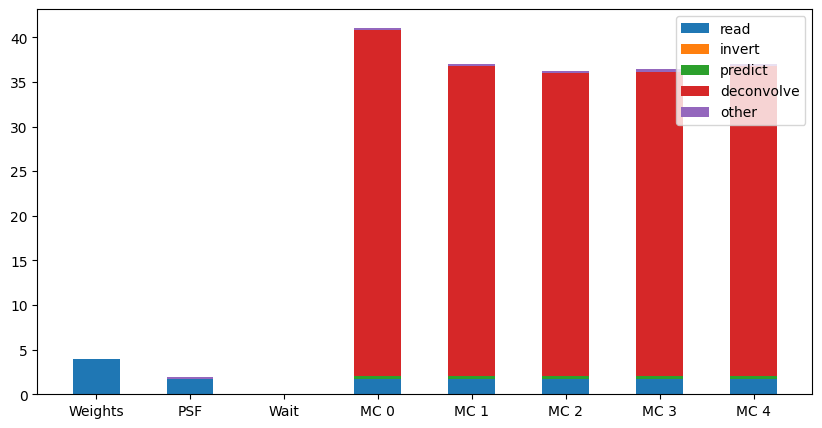

In [47]:
for i, lst in enumerate(vh_parallel_breakdown_data):
    vh_parallel_breakdown_data[i] = list(map(float, lst))

vh_weights_timings = vh_parallel_breakdown_data[1]
vh_psf_timings = vh_parallel_breakdown_data[2]
vh_wait_timings = vh_parallel_breakdown_data[3]
vh_mc_timings = vh_parallel_breakdown_data[4:]

width = 0.5

labels = [
    "Weights",
    "PSF",
    "Wait"
]
    
bottom = numpy.zeros(len(vh_mc_timings) + 3)
    
fig, ax = plt.subplots()

timings = []
timings.append([vh_weights_timings[0], 0, 0, 0, sum(vh_weights_timings[1:])])
timings.append([vh_psf_timings[0], vh_psf_timings[2], 0, 0, vh_psf_timings[1] + sum(vh_psf_timings[3:])])
timings.append([0, 0, 0, 0, vh_wait_timings[0]])

for i, curr_mc_timings in enumerate(vh_mc_timings):
    labels.append("MC " + str(i))
    other_timings = curr_mc_timings[0] + sum(curr_mc_timings[2:5]) + curr_mc_timings[7] + curr_mc_timings[8] + sum(curr_mc_timings[10:])
    timings.append([curr_mc_timings[1], curr_mc_timings[6], curr_mc_timings[5], curr_mc_timings[9], other_timings])
    
print(timings)
    
for i, curr_breakdown in enumerate(breakdowns):
    curr_breakdown_timing = []
    for curr_timing in timings:
        curr_breakdown_timing.append(curr_timing[i])

    p = ax.bar(labels, curr_breakdown_timing, width, label=curr_breakdown, bottom=bottom)
    bottom += curr_breakdown_timing
    
ax.legend(loc="upper right")
plt.show()

## Results for Sgr C Simulated dataset
#### Telescope Configuration: SKA-LOW (full 512)
#### Frequency Bands: 1Ghz
#### RA and DEC: (56, -35)
#### Observation Time (HA): (-2, 2) 
#### Samples: Every 30s
#### $\text{V}_\mathcal{L}$ size: 36213039
#### $\text{V}_\mathcal{H}$ size: 27245071
#### $\text{V}$ size: 63037440
#### $\ell$: 25
#### $\delta$: 1
#### Angular Resolution: 0.0000020815303069902844rad
#### Pixel Resolution: 512x512

## Results for HL Tau dataset
#### Telescope Configuration: ALMA maximum baseline(?)
#### Frequency Bands: 4x4, 224.750GHz - 228.750GHz, 239250 - 243250, 0.5GHz width per channel
#### RA and DEC: (38.42, 57.25)
#### $\text{V}_\mathcal{L}$ size: 39864808
#### $\text{V}_\mathcal{H}$ size: 46243732
#### $\text{V}$ size: 85502624
#### $\ell$: 60
#### $\delta$: 1
#### Angular Resolution: 0.000000024240684rad
#### Pixel Resolution: 1500x1500

## Results for Cygnus A dataset
#### Telescope Configuration: VLA all 4 configurations
#### Frequency Bands: 1.988GHz - 2.372GHz, 2MHz width per channel, S-Band
#### RA and DEC: (38.42, 57.25)
#### $\text{V}_\mathcal{L}$ size: 120189376
#### $\text{V}_\mathcal{H}$ size: 130284800
#### $\text{V}$ size:  246739776
#### $\ell$: 40
#### $\delta$: 1
#### Angular Resolution: 0.0000006060171ad
#### Pixel Resolution: 1728x1728